# **Project - Artificial Neural Networks: Street View Housing Number Digit Recognition**

# Marks: 30

Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.6.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/ADSP/Deep Learning/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

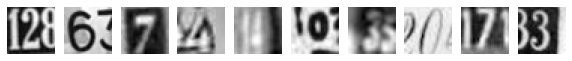

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalise the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [7]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

#### **Question 1: Normalize the train and test data (2 Marks)**

In [9]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255
X_test = X_test/255

In [10]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [11]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observations**
- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done the data preprocessing, let's build an ANN model.

In [12]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 2: Build and train a ANN model as per the above mentioned architecture (10 Marks)**

In [20]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [21]:
# Build the model
model_1 = nn_model_1()

In [22]:
#Print the summary
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                65600     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train,validation_split=0.2,batch_size=128, epochs=20, verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2834 - accuracy: 0.1175 - val_loss: 2.2354 - val_accuracy: 0.1118
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1276 - accuracy: 0.2163 - val_loss: 1.9692 - val_accuracy: 0.2969
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8240 - accuracy: 0.3601 - val_loss: 1.6892 - val_accuracy: 0.4279
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6198 - accuracy: 0.4496 - val_loss: 1.5478 - val_accuracy: 0.4870
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4929 - accuracy: 0.5085 - val_loss: 1.4273 - val_accuracy: 0.5383
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3881 - accuracy: 0.5582 - val_loss: 1.3328 - val_accuracy: 0.5806
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3156 - accuracy: 0.5839 - val_loss: 1.2774 - val_accuracy: 0.6019
Epoch 

### **Plotting the validation and training accuracies**

#### **Question 3: Write your observations on the below plot (2 Marks)**

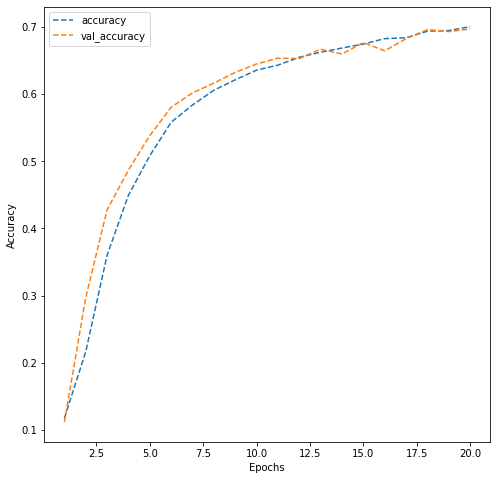

In [24]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:The training accuracy is increasing with the increase in epochs.It looks like it's flattening as it approcaches epoch 20.  Validation is reahcing close to 70% in both testing and validation, so it's giving a generalized performance. But model accuracy is low.**



Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [27]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [28]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)**

In [38]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def nn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    #declare adam optimizer with learning rate of 0.0005 
    adam = optimizers.Adam(learning_rate=0.0005)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [39]:
# Build the model
model_2 = nn_model_2()

In [41]:
#Print the model summary
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)               

In [40]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train,validation_split=0.2,batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 3s 9ms/step - loss: 2.3354 - accuracy: 0.1042 - val_loss: 2.3127 - val_accuracy: 0.0976
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 2.3041 - accuracy: 0.1020 - val_loss: 2.3021 - val_accuracy: 0.1063
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 2.1867 - accuracy: 0.1581 - val_loss: 2.1226 - val_accuracy: 0.1846
Epoch 4/30
263/263 [==============================] - 2s 8ms/step - loss: 1.7688 - accuracy: 0.3635 - val_loss: 1.6433 - val_accuracy: 0.4377
Epoch 5/30
263/263 [==============================] - 2s 8ms/step - loss: 1.4671 - accuracy: 0.5013 - val_loss: 1.3701 - val_accuracy: 0.5352
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 1.3005 - accuracy: 0.5716 - val_loss: 1.2047 - val_accuracy: 0.6049
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 1.1854 - accuracy: 0.6133 - val_loss: 1.1175 - val_accuracy: 0.6336
Epoch 

### **Plotting the validation and training accuracies**

#### **Question 5: Write your observations on the below plot (2 Marks)**

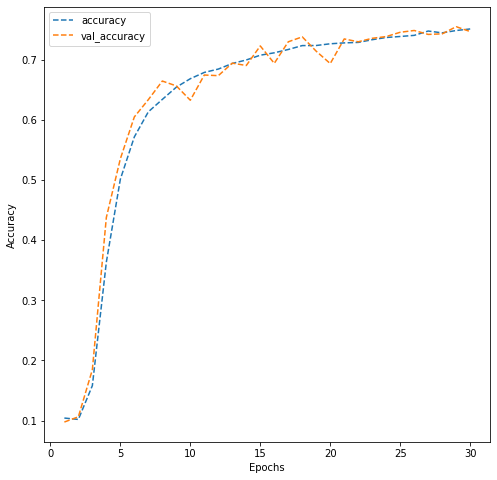

In [42]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:•	The training accuracy is increasing with the increase in epochs.It looks like it's flattening as it approcaches epoch 30. Validation accuracy is a bit choppybe between epochs 10 and 20.  Accuracy is reahcing close to 75% in both testing and validation, so it's giving a generalized performance. But model accuracy is low**

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [43]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [44]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 6: Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results (4 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1814
           1       0.65      0.86      0.74      1828
           2       0.72      0.79      0.76      1803
           3       0.76      0.67      0.71      1719
           4       0.86      0.77      0.81      1812
           5       0.78      0.69      0.73      1768
           6       0.78      0.74      0.76      1832
           7       0.73      0.83      0.78      1808
           8       0.72      0.69      0.70      1812
           9       0.74      0.72      0.73      1804

    accuracy                           0.75     18000
   macro avg       0.76      0.75      0.75     18000
weighted avg       0.76      0.75      0.75     18000



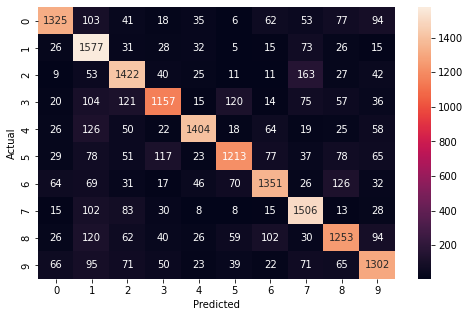

In [45]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) #Write the code for creating confusion matrix using actual labels and predicted labels

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:The classification report shows that highest recall is for 1 and 7, over 0.8. The lowest recall is for number 3, followed by 5 and 8 which are all below 0.7. Confusion matrix shows that significant portion of numbers get correctly predicted. Some number that tend to be misclassified is, 2 as 7, 4 as 1, 6 as 8 and 3 as 2**